In [16]:
import datetime as dt
import pandas as pd
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import logging

# Aplo client init
#aplo_key = keys.aplo_read_key()
#ch.aplo_client = aplo.AploClient(aplo_key, debug=False)

# Talos principal client init
talos_api = keys.talos_principal_api_key()
talos_secret_api = keys.talos_principal_api_secret()
host = keys.talos_principal_host()
ch.talos = talos_utils.Talos(talos_api, talos_secret_api, host)

# Talos whitelabel client init
talos_whitelabel_api = keys.talos_whitelabel_api_key()
talos_whitelabel_secret_api = keys.talos_whitelabel_api_secret()
host_whitelabel_host = keys.talos_whitelabel_host()
ch.talos_wl = talos_utils.Talos(talos_whitelabel_api, talos_whitelabel_secret_api, host_whitelabel_host)

# Google Sheet init using newtrading solutions project ID



NameError: name 'keys' is not defined

Note: you may need to restart the kernel to use updated packages.


In [ ]:
talos_api = keys.talos_api_v2
talos_secret_api = keys.talos_secret_v2
host = keys.talos_host
talos = talos_utils.Talos(talos_api, talos_secret_api, host)

talos_adv_api = keys.talos_api_key_wl
talos_adv_secret_api = keys.talos_api_secret_wl
host_wl = keys.talos_host_wl
talos_wl = talos_utils.Talos(talos_adv_api, talos_adv_secret_api, host_wl)

coinbaseexchange_creds = {
        'apiKey' : keys.coinbase_api,
        'secret' : keys.coinbase_secret,
        'password': keys.coinbase_passphrase
    }

In [ ]:
# We could techincally run this as a loop of strings, but since the orders are huge I'd suggest we fetch them one by one
# For ex, if order one is complete, we don't need to fetch it again so we can comment it out

mstr_fills_1 = talos.get_trade_analytics("c3fc569a-92f0-491c-8690-5ca862011743")
#mstr_fills_2 = talos.get_trade_analytics("81d537fc-6d7f-4490-8df9-8c14a6e32801")
#mstr_fills_3 = talos.get_trade_analytics("06df5ec6-6117-44c1-b9dc-faed8d6f3e96")

In [ ]:
mstr_fills_list = [mstr_fills_1]
mstr_fills = pd.concat([pd.DataFrame(x) for x in mstr_fills_list], axis=0)
mstr_fills.sort_values("Timestamp", inplace=True)

In [ ]:
mstr_fills

,Timestamp,OrderID,Symbol,Side,TradeID,TransactTime,Market,MarketTradeID,Price,PriceAllIn,Quantity,Currency,Amount,AmountCurrency,DealtCurrency,Fee,CandidateLiquidityBucketIdx,CandidateExpectedFillPrice,CandidateExpectedFillQty,CandidateBpsFromBest,CandidateMarketBestBid,CandidateMarketBestOffer,CandidateMarket
0,2025-01-17T14:39:50.811318Z,c3fc569a-92f0-491c-8690-5ca862011743,BTC-USD,Buy,fab45be9-e0e6-4551-8a1d-692d4f37ec48,2025-01-17T14:39:50.801000Z,janestreet,EXC-39154-20250117,102919.6543668,102919.6543668,0.03700000,BTC,3808.02721157,USD,BTC,0,0,102915.504910552679,2.21372589,0,0,0,NaN
1,2025-01-17T14:39:50.811318Z,c3fc569a-92f0-491c-8690-5ca862011743,BTC-USD,Buy,fab45be9-e0e6-4551-8a1d-692d4f37ec48,2025-01-17T14:39:50.801000Z,janestreet,EXC-39154-20250117,102919.6543668,102919.6543668,0.03700000,BTC,3808.02721157,USD,BTC,0,0,102916.68,1.70672589,0.11,0,0,cumberland
2,2025-01-17T14:39:50.811318Z,c3fc569a-92f0-491c-8690-5ca862011743,BTC-USD,Buy,fab45be9-e0e6-4551-8a1d-692d4f37ec48,2025-01-17T14:39:50.801000Z,janestreet,EXC-39154-20250117,102919.6543668,102919.6543668,0.03700000,BTC,3808.02721157,USD,BTC,0,0,102911.30531914,0.47000000,-0.41,102803.91000000,102901.85000000,galaxy
3,2025-01-17T14:39:50.811318Z,c3fc569a-92f0-491c-8690-5ca862011743,BTC-USD,Buy,fab45be9-e0e6-4551-8a1d-692d4f37ec48,2025-01-17T14:39:50.801000Z,janestreet,EXC-39154-20250117,102919.6543668,102919.6543668,0.03700000,BTC,3808.02721157,USD,BTC,0,0,102914.6468668,0.03700000,-0.08,102857.2815751,102919.6543668,janestreet
4,2025-01-17T14:39:50.825950Z,c3fc569a-92f0-491c-8690-5ca862011743,BTC-USD,Buy,41de5849-b4e7-4e96-b3f5-891bcb9a4da7,2025-01-17T14:39:50.800000Z,galaxy,147043782053202137,102911.30531915,102911.30531915,0.47000000,BTC,48368.3135,USD,BTC,0,0,102915.504910552679,2.21372589,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,2025-01-17T15:31:49.550861Z,c3fc569a-92f0-491c-8690-5ca862011743,BTC-USD,Buy,7f54b81d-ff46-4094-8f9b-1e39a43b83a9,2025-01-17T15:31:49.541000Z,janestreet,EXC-51643-20250117,104099.0705001,104099.0705001,0.00000030,BTC,0.03122972,USD,BTC,0,0,104040.76000000,0,-5.60,103932.43000000,104043.87000000,galaxy
4847,2025-01-17T15:31:49.550861Z,c3fc569a-92f0-491c-8690-5ca862011743,BTC-USD,Buy,7f54b81d-ff46-4094-8f9b-1e39a43b83a9,2025-01-17T15:31:49.541000Z,janestreet,EXC-51643-20250117,104099.0705001,104099.0705001,0.00000030,BTC,0.03122972,USD,BTC,0,0,104099.0705001,0.00000030,0,104034.1582465,104099.0705001,janestreet
4844,2025-01-17T15:31:49.550861Z,c3fc569a-92f0-491c-8690-5ca862011743,BTC-USD,Buy,7f54b81d-ff46-4094-8f9b-1e39a43b83a9,2025-01-17T15:31:49.541000Z,janestreet,EXC-51643-20250117,104099.0705001,104099.0705001,0.00000030,BTC,0.03122972,USD,BTC,0,0,104099.070500000000,0.00000030,0,0,0,NaN
4845,2025-01-17T15:31:49.550861Z,c3fc569a-92f0-491c-8690-5ca862011743,BTC-USD,Buy,7f54b81d-ff46-4094-8f9b-1e39a43b83a9,2025-01-17T15:31:49.541000Z,janestreet,EXC-51643-20250117,104099.0705001,104099.0705001,0.00000030,BTC,0.03122972,USD,BTC,0,0,104128.46,0,2.82,104029.84,104128.46,cumberland


In [ ]:
# Fetch every order individually, this code often fails so I have to run it multiple times
# sometimes 1 order fetches and the other doesn't, 
# so I comment all the orders that I have successfully fetched data for so I don't take the risk of it failing when I run the block one more time

#mstr_fills_1 = talos.get_trade_analytics_rest("6eede772-39a2-4355-9711-330434d8d96f")
# mstr_fills_2 = talos.get_trade_analytics_rest("81d537fc-6d7f-4490-8df9-8c14a6e32801")
# mstr_fills_3 = talos.get_trade_analytics_rest("06df5ec6-6117-44c1-b9dc-faed8d6f3e96")
mstr_fills_list = [mstr_fills_1, mstr_fills_2]
mstr_fills = pd.concat([pd.DataFrame(x) for x in mstr_fills_list], axis=0)
#mstr_fills.to_csv("mstr_fills.csv", index=False)
#mstr_fills = pd.read_csv("mstr_fills.csv")
#mstr_fills = talos.get_trade_analytics_rest("659e89e9-b36b-4d10-adb0-96e17b679844")


In [ ]:
order_min_date = mstr_fills["Timestamp"].min()
order_max_date = mstr_fills["Timestamp"].max()
hours_to_fetch = math.ceil((dt.datetime.now(dt.timezone.utc) - pd.to_datetime(order_min_date)).total_seconds() / 3600)

modified_date_range = {"1s": hours_to_fetch, "1m": hours_to_fetch}
benchmark_market_data = pricer.MarketData("binance", "BTC/USDT", date_range = modified_date_range)
usd_benchmark_market_data = pricer.MarketData("coinbaseexchange", "USDT/USD", date_range = modified_date_range, credentials=coinbaseexchange_creds) #to authenticate to cooinbase "use coinbaseexchange"

In [ ]:
# benchmark_market_data.ohlcv_data["spot"]["1s"].to_csv("btc_usdt_1s.csv", index=False)
# usd_benchmark_market_data.ohlcv_data["spot"]["1s"].to_csv("usdc_usdt_1s.csv", index=False)
# benchmark_market_data.ohlcv_data["spot"]["1m"].to_csv("btc_usdt_1m.csv", index=False)
# usd_benchmark_market_data.ohlcv_data["spot"]["1m"].to_csv("usdc_usdt_1m.csv", index=False)

In [ ]:
coinbase_talos_prices = pd.DataFrame(talos.get_ohlcv("BTC-USD", "coinbase", "1m", order_min_date, order_max_date))
coinbase_talos_prices = ru.format_columns(coinbase_talos_prices)
#coinbase_talos_prices["Timestamp"] = coinbase_talos_prices["Timestamp"].dt.tz_localize(None)

In [2]:
#coinbase_talos_prices.set_index("Timestamp", inplace=True)
# coinbase_talos_prices

In [3]:
#binance_price = pd.read_csv("binance_usd.csv")
binance_price = benchmark_market_data.ohlcv_data["spot"]["1s"].copy()
#binance_price["datetime"] = pd.to_datetime(binance_price["datetime"]).dt.tz_localize("UTC")

#binance_price_1m = pd.read_csv("binance_usd_1m.csv")
binance_price_1m = benchmark_market_data.ohlcv_data["spot"]["1m"].copy()
usd_benchmark_1m = usd_benchmark_market_data.ohlcv_data["spot"]["1m"].copy()
binance_price_1m = binance_price_1m.merge(usd_benchmark_1m, on="datetime", how="left", suffixes=("_binance", "_usd"))
binance_price_1m["close_adjusted"] = binance_price_1m["close_binance"] * binance_price_1m["close_usd"]
binance_price_1m.reset_index(inplace=True)
binance_price_1m["datetime"] = binance_price_1m["datetime"].dt.tz_localize("UTC")
#binance_price_1m["datetime"] = pd.to_datetime(binance_price_1m["datetime"]).dt.tz_localize("UTC")

NameError: name 'benchmark_market_data' is not defined

In [4]:
coinbase_binance_comp = coinbase_talos_prices[["Timestamp", "Close"]].merge(binance_price_1m[["datetime", "close_binance", "close_adjusted"]], left_on="Timestamp", right_on="datetime", how="inner").drop(columns=["datetime"])
coinbase_binance_comp["diff"] = coinbase_binance_comp["Close"] - coinbase_binance_comp["close_adjusted"]
coinbase_binance_comp["flag"] = np.where(coinbase_binance_comp["diff"] >= 0, 1, 0)

NameError: name 'coinbase_talos_prices' is not defined

In [5]:
mstr_fills_converted = ru.format_columns(mstr_fills).copy()
mstr_fills_converted["spread_ccy"] = mstr_fills_converted["CandidateMarketBestOffer"] - mstr_fills_converted["CandidateMarketBestBid"]
mstr_fills_converted["spread_bps"] = (mstr_fills_converted["CandidateMarketBestOffer"] / mstr_fills_converted["CandidateMarketBestBid"] - 1)*10000
mstr_fills_converted_execution = mstr_fills_converted.query("CandidateMarket.isna()").reset_index(drop=True).copy()
mstr_fills_converted = mstr_fills_converted.dropna(subset=["spread_bps"])
mstr_fills_converted_execution["VWAP"] = (mstr_fills_converted_execution['PriceAllIn'] * mstr_fills_converted_execution['Quantity']).cumsum() / mstr_fills_converted_execution['Quantity'].cumsum()
mstr_fills_converted = mstr_fills_converted.merge(mstr_fills_converted_execution[["MarketTradeID", "VWAP"]], on="MarketTradeID", suffixes=("", "_execution"))


NameError: name 'ru' is not defined

In [6]:
mstr_fills_converted.sort_values("Timestamp", inplace=True)

NameError: name 'mstr_fills_converted' is not defined

In [7]:
mstr_fills_converted_coinbase = pd.merge_asof(mstr_fills_converted, coinbase_talos_prices[["Timestamp", "Close"]], left_on="Timestamp", right_on="Timestamp", direction="nearest")
mstr_fills_converted_coinbase.rename(columns={"Close": "close_adjusted"}, inplace=True)
mstr_fills_converted_coinbase["spread_offer"] = (mstr_fills_converted_coinbase["CandidateMarketBestOffer"] / mstr_fills_converted_coinbase["close_adjusted"] - 1)*10000
mstr_fills_converted_coinbase["spread_bid"] = (mstr_fills_converted_coinbase["CandidateMarketBestBid"] / mstr_fills_converted_coinbase["close_adjusted"] - 1)*10000
mstr_fills_converted_coinbase["spread_executed_px"] = (mstr_fills_converted_coinbase["PriceAllIn"] / mstr_fills_converted_coinbase["close_adjusted"] - 1)*10000

NameError: name 'mstr_fills_converted' is not defined

In [8]:
# mstr_fills_converted_binance = pd.merge_asof(mstr_fills_converted, binance_price[["datetime", "close_adjusted"]], left_on="Timestamp", right_on="datetime", direction="nearest")
# mstr_fills_converted_binance["spread_offer"] = (mstr_fills_converted_binance["CandidateMarketBestOffer"] / mstr_fills_converted_binance["close_adjusted"] - 1)*10000
# mstr_fills_converted_binance["spread_bid"] = (mstr_fills_converted_binance["CandidateMarketBestBid"] / mstr_fills_converted_binance["close_adjusted"] - 1)*10000
# mstr_fills_converted_binance["spread_executed_px"] = (mstr_fills_converted_binance["PriceAllIn"] / mstr_fills_converted_binance["close_adjusted"] - 1)*10000

In [9]:
mstr_fills_converted_binance_1m = pd.merge_asof(mstr_fills_converted, binance_price_1m[["datetime", "close_adjusted"]], left_on="Timestamp", right_on="datetime", direction="nearest")
mstr_fills_converted_binance_1m["spread_offer"] = (mstr_fills_converted_binance_1m["CandidateMarketBestOffer"] / mstr_fills_converted_binance_1m["close_adjusted"] - 1)*10000
mstr_fills_converted_binance_1m["spread_bid"] = (mstr_fills_converted_binance_1m["CandidateMarketBestBid"] / mstr_fills_converted_binance_1m["close_adjusted"] - 1)*10000
mstr_fills_converted_binance_1m["spread_executed_px"] = (mstr_fills_converted_binance_1m["PriceAllIn"] / mstr_fills_converted_binance_1m["close_adjusted"] - 1)*10000

NameError: name 'mstr_fills_converted' is not defined

In [10]:
candidate_markets = mstr_fills_converted["CandidateMarket"].unique()
dealer_win_count = dict.fromkeys(candidate_markets,0)

def get_dealer_win_count(row, dealer_win_count):
    winner_dealer = row["Market"]
    qty = row["Quantity"]
    dealer_win_count[winner_dealer] += qty
    #dealer_win_count[winner_dealer] += 1

    return dealer_win_count.copy()
    

mstr_fills_converted_execution["win_dict"] = mstr_fills_converted_execution.apply(lambda row: get_dealer_win_count(row, dealer_win_count), axis=1)

NameError: name 'mstr_fills_converted' is not defined

In [11]:
win_tracker = pd.json_normalize(mstr_fills_converted_execution["win_dict"])
win_tracker = win_tracker.apply(lambda row: row/row.sum(), axis=1)
mstr_fills_converted_execution = mstr_fills_converted_execution.merge(win_tracker, left_index=True, right_index=True)

NameError: name 'mstr_fills_converted_execution' is not defined

# General order stats

In [12]:
order_stats = mstr_fills_converted_execution.groupby("Market").agg(
        quantity = ("Quantity", "sum"),
        amount = ("Amount", "sum"),
        average_px = ("PriceAllIn", "mean"),
        fills = ("Quantity", "count"),

)
order_stats.loc["total"] = order_stats.sum()
order_stats["win_rate"] = order_stats["quantity"] / order_stats.loc["total", "quantity"]
order_stats

NameError: name 'mstr_fills_converted_execution' is not defined

In [20]:
test_resampled = mstr_fills_converted_execution.copy()
test_resampled.set_index('Timestamp', inplace=True)

<Axes: xlabel='Timestamp'>

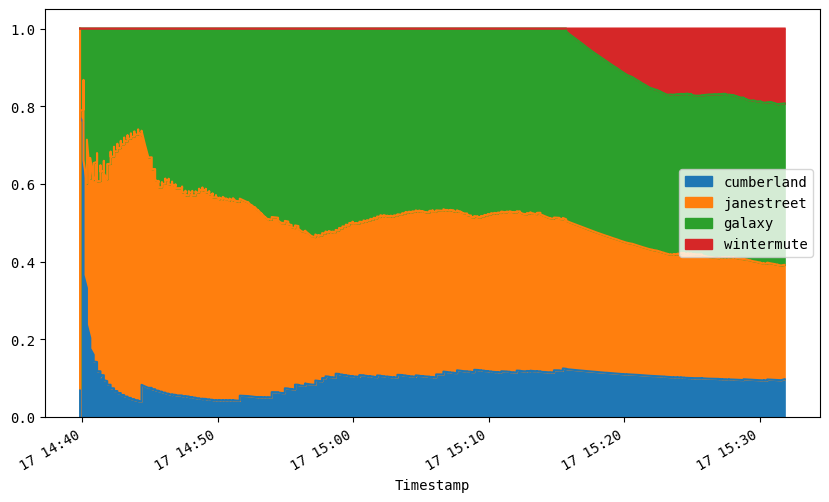

In [21]:
test_resampled[['cumberland', 'janestreet', 'galaxy', 'wintermute']].plot.area(stacked=True, figsize=(10, 6))

# Charts

> minor chart style configs

>source: https://stackoverflow.com/questions/32185411/break-in-x-axis-of-matplotlib/32186074#32186074

In [22]:
dealer_colors = {
    "cumberland": {"color": "black", "name": "Cumberland"},
    "wintermute": {"color": "limegreen", "name": "Wintermute"},
    "janestreet": {"color": "blue", "name": "Jane Street"},
    "galaxy": {"color": "red", "name": "Galaxy"},
}

# this is used to create breaks in the charts for periods where the order was unmarketeable
gap_threshold_mins = 5
compress_charts_time = False
hide_line_with_no_fills = True

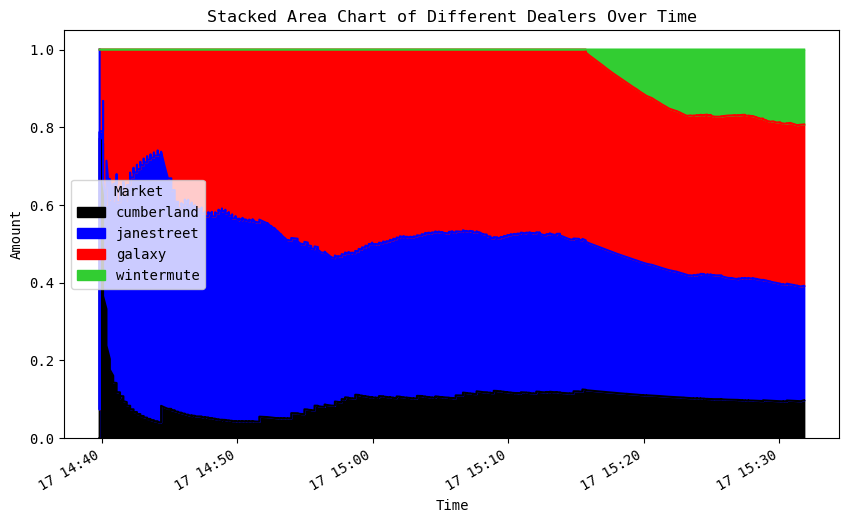

In [23]:
# Extract the color and rename information
colors = [dealer_colors[col]['color'] if col in dealer_colors else 'gray' for col in ['cumberland', 'janestreet', 'galaxy', 'wintermute']]
#renamed_columns = {col: dealer_colors[col]['name'] if col in dealer_colors else col.capitalize() for col in test_resampled.columns}

# Rename columns to match the desired legend labels
#test_resampled.rename(columns=renamed_columns, inplace=True)

# Plot the stacked area chart with custom colors
test_resampled[['cumberland', 'janestreet', 'galaxy', 'wintermute']].plot.area(stacked=True, figsize=(10, 6), color=colors)

# Adding titles and labels
plt.title('Stacked Area Chart of Different Dealers Over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Market')
plt.show()

# Chart for Dealers own bid/offer spread over time

### Don't be afraid of the long code, is just multiple options for charting based on conf above

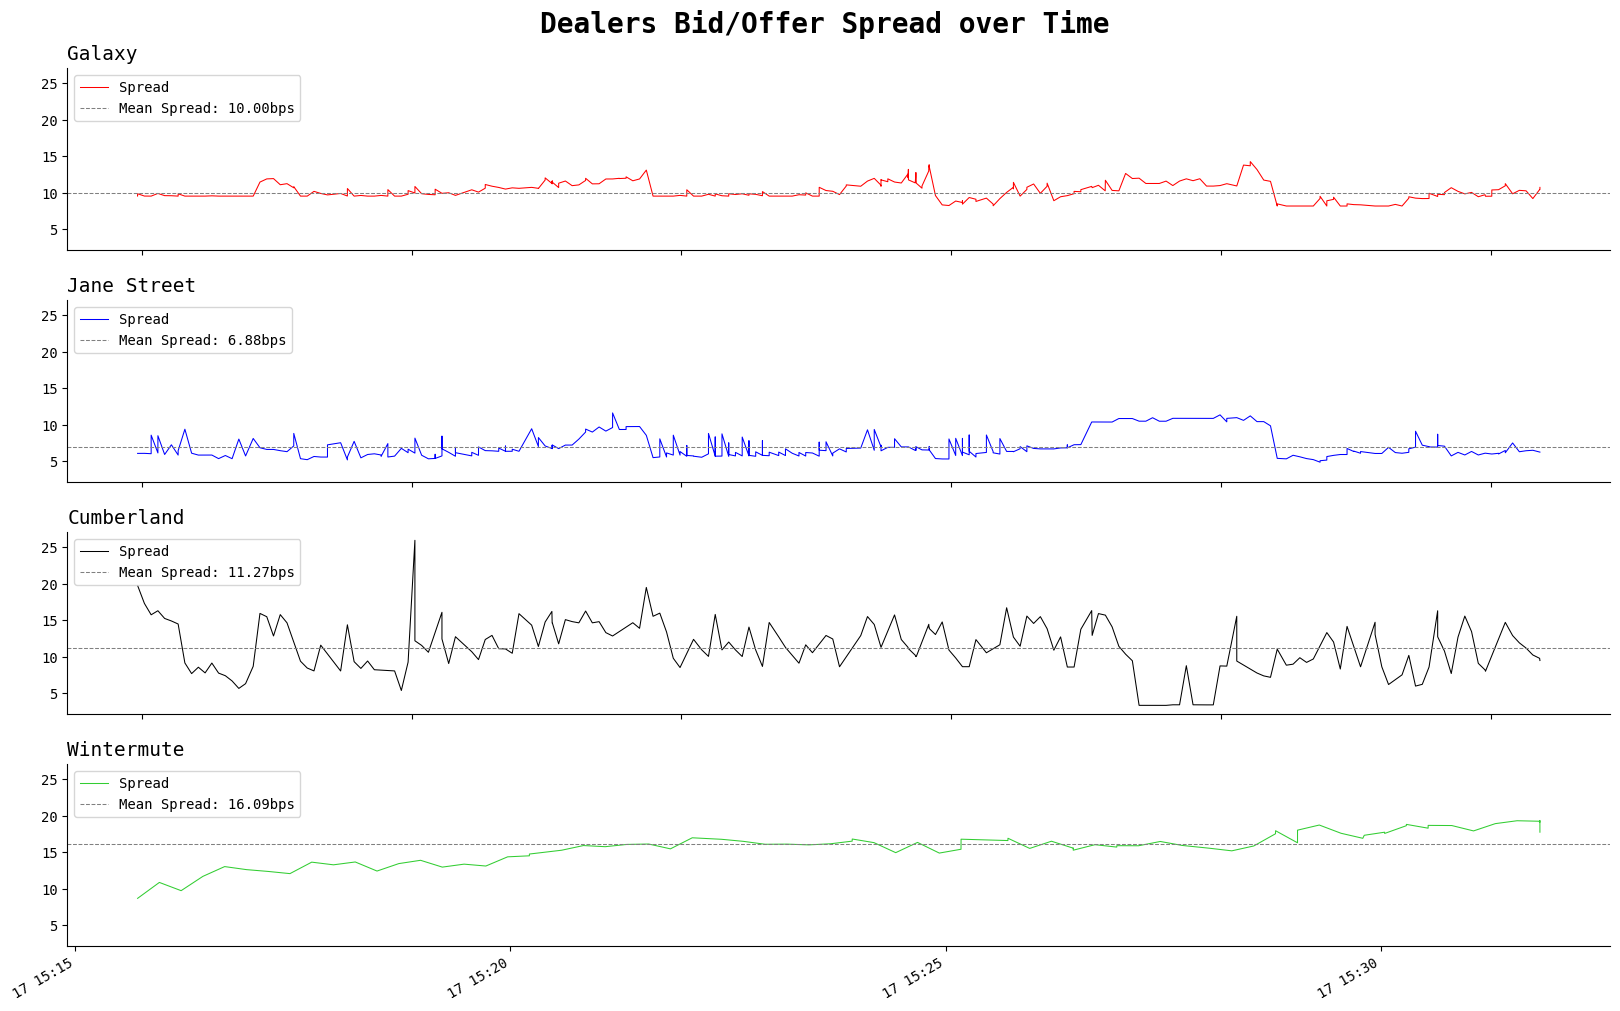

In [24]:
time_diff = mstr_fills_converted_coinbase['Timestamp'].diff()
gap_threshold = pd.Timedelta(minutes=gap_threshold_mins)
mstr_fills_converted_coinbase['group'] = (time_diff > gap_threshold).cumsum()
n_groups = mstr_fills_converted_coinbase['group'].max()+1

if compress_charts_time:
    fig, axs = plt.subplots(len(mstr_fills_converted_coinbase['CandidateMarket'].unique()), n_groups, sharey=True, figsize=(16,12))
else:
    fig, axs =plt.subplots(len(mstr_fills_converted_coinbase['CandidateMarket'].unique()), sharey=True, figsize=(16,12))

for i, market in enumerate(mstr_fills_converted_coinbase['CandidateMarket'].unique()):
    market_data = mstr_fills_converted_coinbase[mstr_fills_converted_coinbase['CandidateMarket'] == market].copy()
    mean_spread = market_data['spread_bps'].mean()
    if n_groups > 0:
        if compress_charts_time:
            for _, group in market_data.groupby('group'):

                d = .03  # how big to make the diagonal lines in axes coordinates
                kwargs = dict(transform=axs[i,0].transAxes, color='k', linewidth=0.75, clip_on=False)
                axs[i,0].plot((1-d, 1+d), (-d, +d), **kwargs)

                for j in range(0,n_groups):
                    df_date_split = market_data[market_data['group'] == j].copy()
                    axs[i,j].plot(df_date_split["Timestamp"], df_date_split['spread_bps'], linewidth=0.75, color=dealer_colors.get(market, 'tab:gray').get("color", 'tab:gray'))
                    axs[i,0].set_title(f'{dealer_colors.get(market, market).get("name", market)}', fontsize=14, fontfamily="monospace", loc='left')
                    axs[i,j].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps' if _ == 0 else "")
                    axs[i,j].spines[['top', "right"]].set_visible(False)
                    if j != 0:
                        axs[i,j].spines[['top', "left", "right"]].set_visible(False)
                        axs[i,j].spines[['top', "left","right"]].set_visible(False)
                        axs[i,j].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
                        axs[i,j].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

                        kwargs.update(transform=axs[i,j].transAxes)
                        axs[i,j].plot((1-d, 1+d), (-d, +d), **kwargs)
                        axs[i,j].plot((-d, +d), (-d, +d), **kwargs)
            
                for n in range(-n_groups,0):
                    axs[-1,n].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
                    axs[-1,n].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
                    axs[-1,n].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

            axs[i,0].legend(loc='upper left')
            axs[i,0].legend(loc='upper left')
            axs[i,0].legend(loc='upper left')

        else:
            if hide_line_with_no_fills:
                for _, group in market_data.groupby('group'):
                    axs[i].plot(group['Timestamp'], group['spread_bps'], linewidth=0.75, color=dealer_colors.get(market, 'tab:gray').get("color", 'tab:gray'), label="Spread" if _ == 0 else "")
                
                axs[i].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps')
                axs[i].set_title(f'{dealer_colors.get(market, market).get("name", market)}', fontsize=14, fontfamily="monospace", loc='left')
                axs[i].legend(loc='upper left')
                axs[i].spines[['top', "right"]].set_visible(False)
            else:
                axs[i].plot(market_data['Timestamp'], market_data['spread_bps'], linewidth=0.75, color=dealer_colors.get(market, 'tab:gray').get("color", 'tab:gray'), label="Spread" if _ == 0 else "")
                axs[i].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps')
                axs[i].set_title(f'{dealer_colors.get(market, market).get("name", market)}', fontsize=14, fontfamily="monospace", loc='left')
                axs[i].legend(loc='upper left')
                axs[i].spines[['top', "right"]].set_visible(False)
                
    else:
        axs[i].plot(market_data["Timestamp"], market_data['spread_bps'], linewidth=0.75, color=dealer_colors.get(market, 'tab:gray').get("color", 'tab:gray'), label=dealer_colors.get(market, market).get("name", market))
        axs[i].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps')
        axs[i].spines[['top', "right"]].set_visible(False)
        axs[i].legend(loc='upper left')
        axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

fig.suptitle('Dealers Bid/Offer Spread over Time', fontsize=20, fontweight="bold", fontfamily="monospace")

plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

# I think you can ignore everything below here

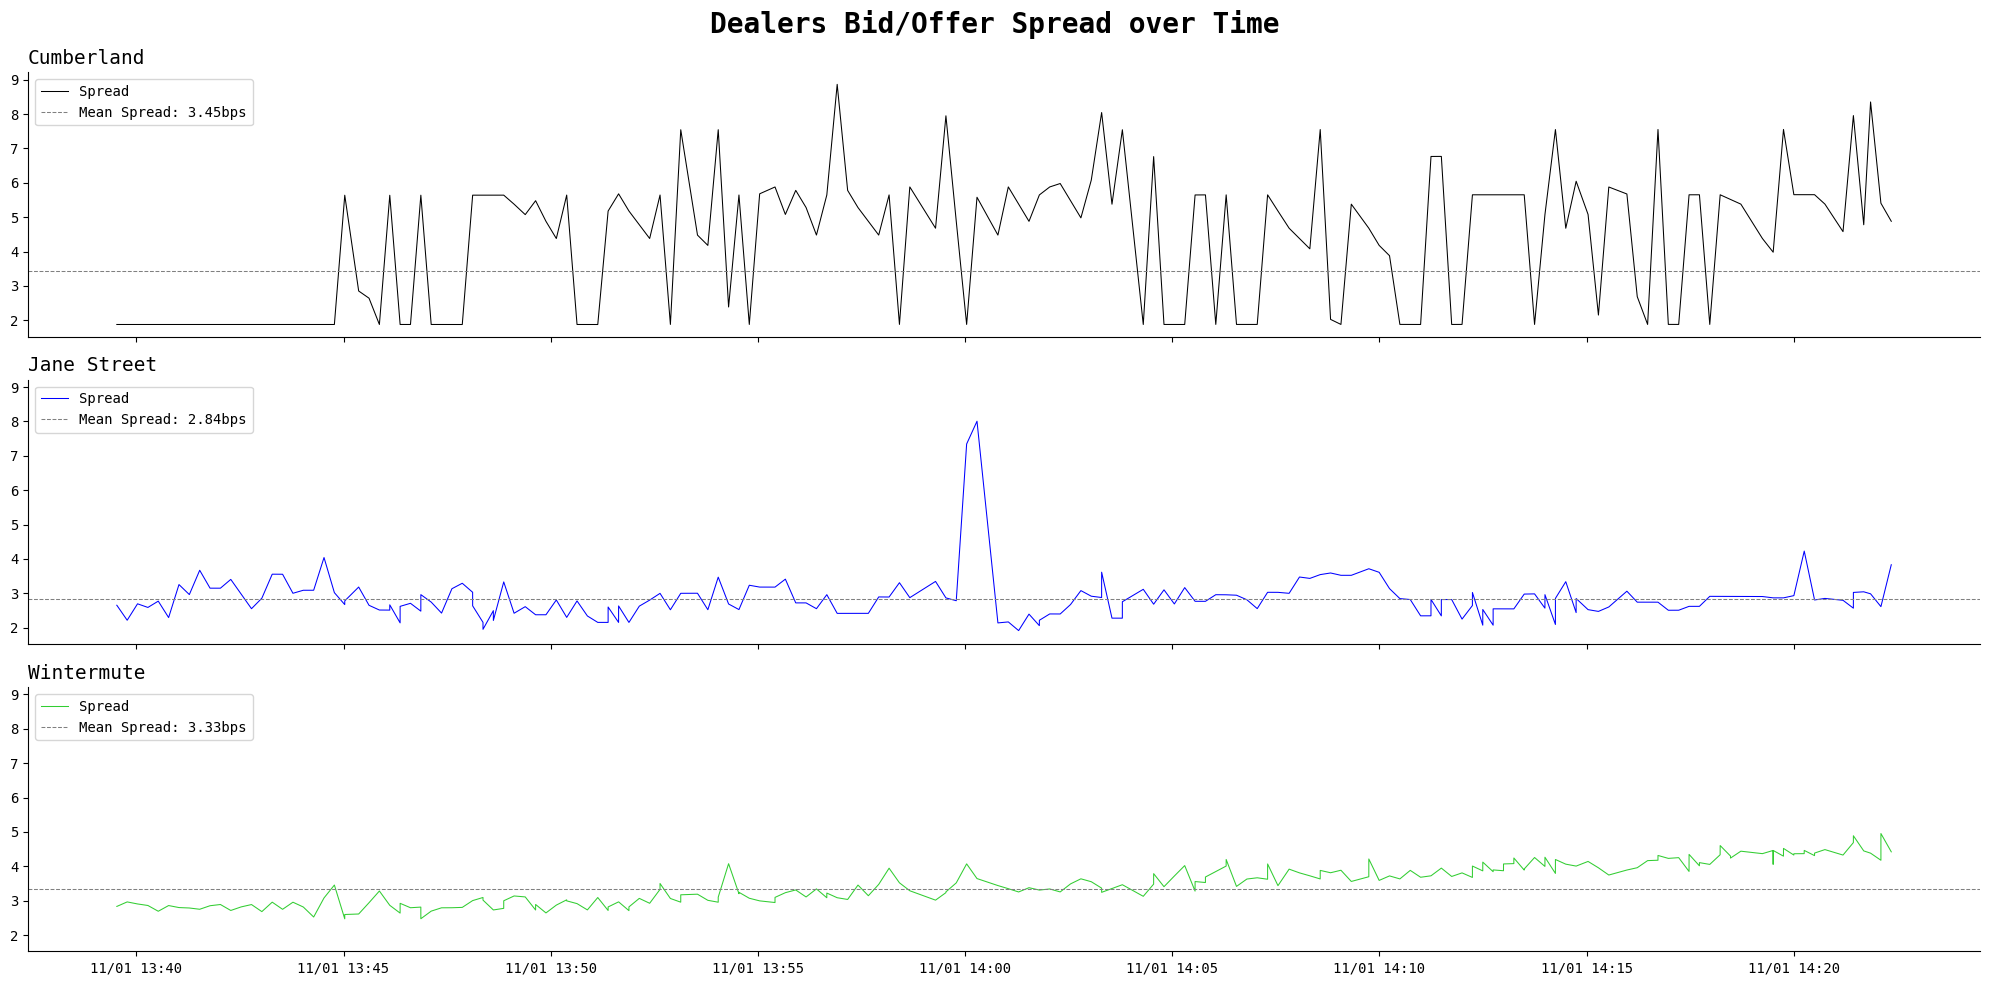

In [ ]:
fig, axs = plt.subplots(len(mstr_fills_converted_coinbase['CandidateMarket'].unique()), sharex=True, sharey=True, figsize=(20,10))
fig.suptitle('Dealers Bid/Offer Spread over Time', fontsize=20, fontweight="bold", fontfamily="monospace")

for i, market in enumerate(mstr_fills_converted_coinbase['CandidateMarket'].unique()):
    market_data = mstr_fills_converted_coinbase[mstr_fills_converted_coinbase['CandidateMarket'] == market].copy()
    mean_spread = market_data['spread_bps'].mean()
    time_diff = market_data['Timestamp'].diff()
    gap_threshold = pd.Timedelta(minutes=2)
    market_data['group'] = (time_diff > gap_threshold).cumsum()
    for _, group in market_data.groupby('group'):
        axs[i].plot(group['Timestamp'], group['spread_bps'], linewidth=0.75, color=dealer_colors.get(market, 'tab:gray').get("color", 'tab:gray'), label="Spread" if _ == 0 else "")
    
    axs[i].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps')
    axs[i].set_title(f'{dealer_colors.get(market, market).get("name", market)}', fontsize=14, fontfamily="monospace", loc='left')
    axs[i].legend(loc='upper left')
    axs[i].spines[['top', "right"]].set_visible(False)
    

axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

plt.tight_layout()
plt.show()

In [43]:
fig, axs = plt.subplots(len(mstr_fills_converted_binance['CandidateMarket'].unique()), sharex=True, sharey=True, figsize=(16,8))

fig.suptitle('Dealers Offer Spread over Binance BTC/USDT 1s Close price (USD Adjusted)', fontsize=20, fontweight="bold", fontfamily="monospace")

for i, market in enumerate(mstr_fills_converted_binance['CandidateMarket'].unique()):
    market_data = mstr_fills_converted_binance[mstr_fills_converted_binance['CandidateMarket'] == market].copy()
    mean_spread = market_data['spread_offer'].mean()
    time_diff = market_data['Timestamp'].diff()
    gap_threshold = pd.Timedelta(minutes=30)
    market_data['group'] = (time_diff > gap_threshold).cumsum()
    for _, group in market_data.groupby('group'):
        axs[i].plot(group['Timestamp'], group['spread_offer'], linewidth=0.75, color=dealer_colors.get(market, 'tab:gray').get("color", 'tab:gray'), label=dealer_colors.get(market, market).get("name", market) if _ == 0 else "")

    axs[i].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps')
    axs[i].axhline(y=0, color='black', alpha=0.5, linewidth=0.75)
    #axs[i].set_title(f'{dealer_colors.get(market, market).get("name", market)}', fontsize=14, fontfamily="monospace", loc='left')
    axs[i].legend(loc='upper left')
    axs[i].spines[['top', "right"]].set_visible(False)
    

axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

plt.tight_layout()
plt.show()

NameError: name 'mstr_fills_converted_binance' is not defined

In [29]:
time_diff = mstr_fills_converted_binance['Timestamp'].diff()
gap_threshold = pd.Timedelta(minutes=gap_threshold_mins)
mstr_fills_converted_binance['group'] = (time_diff > gap_threshold).cumsum()
n_groups = mstr_fills_converted_binance['group'].max()+1

if compress_charts_time:
    fig, axs = plt.subplots(len(mstr_fills_converted_binance['CandidateMarket'].unique()), n_groups, sharey=True, figsize=(16,12))
else:
    fig, axs =plt.subplots(len(mstr_fills_converted_binance['CandidateMarket'].unique()), sharey=True, figsize=(16,12))

for i, market in enumerate(mstr_fills_converted_binance['CandidateMarket'].unique()):
    market_data = mstr_fills_converted_binance[mstr_fills_converted_binance['CandidateMarket'] == market].copy()
    mean_spread = market_data['spread_offer'].mean()
    if n_groups > 0:
        if compress_charts_time:
            for _, group in market_data.groupby('group'):

                d = .03  # how big to make the diagonal lines in axes coordinates
                kwargs = dict(transform=axs[i,0].transAxes, color='k', linewidth=0.75, clip_on=False)
                axs[i,0].plot((1-d, 1+d), (-d, +d), **kwargs)

                for j in range(0,n_groups):
                    df_date_split = market_data[market_data['group'] == j].copy()
                    axs[i,j].plot(df_date_split["Timestamp"], df_date_split['spread_offer'], linewidth=0.75, color=dealer_colors.get(market, 'tab:gray').get("color", 'tab:gray'))
                    axs[i,0].set_title(f'{dealer_colors.get(market, market).get("name", market)}', fontsize=14, fontfamily="monospace", loc='left')
                    axs[i,j].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps' if _ == 0 else "")
                    axs[i,j].spines[['top', "right"]].set_visible(False)
                    if j != 0:
                        axs[i,j].spines[['top', "left", "right"]].set_visible(False)
                        axs[i,j].spines[['top', "left","right"]].set_visible(False)
                        axs[i,j].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
                        axs[i,j].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

                        kwargs.update(transform=axs[i,j].transAxes)
                        axs[i,j].plot((1-d, 1+d), (-d, +d), **kwargs)
                        axs[i,j].plot((-d, +d), (-d, +d), **kwargs)
            
                for n in range(-n_groups,0):
                    axs[-1,n].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
                    axs[-1,n].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
                    axs[-1,n].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

            axs[i,0].legend(loc='upper left')
            axs[i,0].legend(loc='upper left')
            axs[i,0].legend(loc='upper left')

        else:
            if hide_line_with_no_fills:
                for _, group in market_data.groupby('group'):
                    axs[i].plot(group['Timestamp'], group['spread_offer'], linewidth=0.75, color=dealer_colors.get(market, 'tab:gray').get("color", 'tab:gray'), label="Spread" if _ == 0 else "")
                
                axs[i].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps')
                axs[i].set_title(f'{dealer_colors.get(market, market).get("name", market)}', fontsize=14, fontfamily="monospace", loc='left')
                axs[i].legend(loc='upper left')
                axs[i].spines[['top', "right"]].set_visible(False)
            else:
                axs[i].plot(market_data['Timestamp'], market_data['spread_offer'], linewidth=0.75, color=dealer_colors.get(market, 'tab:gray').get("color", 'tab:gray'), label="Spread" if _ == 0 else "")
                axs[i].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps')
                axs[i].set_title(f'{dealer_colors.get(market, market).get("name", market)}', fontsize=14, fontfamily="monospace", loc='left')
                axs[i].legend(loc='upper left')
                axs[i].spines[['top', "right"]].set_visible(False)
                
    else:
        axs[i].plot(market_data["Timestamp"], market_data['spread_offer'], linewidth=0.75, color=dealer_colors.get(market, 'tab:gray').get("color", 'tab:gray'), label=dealer_colors.get(market, market).get("name", market))
        axs[i].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps')
        axs[i].spines[['top', "right"]].set_visible(False)
        axs[i].legend(loc='upper left')
        axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

fig.suptitle('Dealers Offer Spread over Binance BTC/USDT 1s Close price (USD Adjusted)', fontsize=20, fontweight="bold", fontfamily="monospace")

plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

NameError: name 'mstr_fills_converted_binance' is not defined

In [30]:
fig, axs = plt.subplots(len(mstr_fills_converted_binance['CandidateMarket'].unique()), sharex=True, sharey=True, figsize=(20,12))
dealer_colors = {
    "cumberland": {"color": "black", "name": "Cumberland"},
    "wintermute": {"color": "limegreen", "name": "Wintermute"},
    "janestreet": {"color": "blue", "name": "Jane Street"},
}

fig.suptitle('Dealers Spreads over Binance BTC/USDT 1s Close price (USD Adjusted)', fontsize=20, fontweight="bold", fontfamily="monospace")
min_y = -16
max_y = 16
for i, market in enumerate(mstr_fills_converted_binance['CandidateMarket'].unique()):
    market_data = mstr_fills_converted_binance[mstr_fills_converted_binance['CandidateMarket'] == market].copy()
    mean_spread = (market_data['spread_offer']-market_data['spread_bid']).mean()
    max_spread = max(market_data['spread_offer'].max(),market_data['spread_bid'].max())
    timestamp = market_data.loc[market_data['spread_bps'].idxmax()]["Timestamp"]
    #min_spread = market_data['spread_bps'].min()
    time_diff = market_data['Timestamp'].diff()
    gap_threshold = pd.Timedelta(minutes=2)
    market_data['group'] = (time_diff > gap_threshold).cumsum()
    for _, group in market_data.groupby('group'):
        axs[i].plot(group['Timestamp'], group['spread_offer'], linewidth=0.75, color="firebrick", label="Offer spread" if _ == 0 else "")
        axs[i].plot(group['Timestamp'], group['spread_bid'], linewidth=0.75, color="forestgreen", label="Bid spread" if _ == 0 else "")
        axs[i].set_title(f'{dealer_colors.get(market, market).get("name", market)}', fontsize=14, fontfamily="monospace", loc='left')

        if max_spread > max_y:
            axs[i].annotate(f'Max Spread: {max_spread:.2f}bps', xy=(timestamp, max_y), xytext=(timestamp+dt.timedelta(minutes=15), max_y), arrowprops=dict(facecolor='black', arrowstyle='->'))

    axs[i].axhline(y=mean_spread, linewidth=0.75, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread:.2f}bps')
    axs[i].axhline(y=0, color='black', alpha=0.5, linewidth=0.75)
    axs[i].legend(bbox_to_anchor=(0., 1.0, 1., .1), loc='lower right',
                      ncols=3, borderaxespad=0.)
    axs[i].spines[['top', "right"]].set_visible(False)
    axs[i].set_ylim(min_y, max_y)
    

axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

plt.tight_layout()
plt.show()

NameError: name 'mstr_fills_converted_binance' is not defined

In [31]:
dfs_to_plot = [mstr_fills_converted_coinbase, mstr_fills_converted_binance_1m, mstr_fills_converted_binance]
n_subplots = len(dfs_to_plot)
fig, axs = plt.subplots(n_subplots, sharex=True, sharey=True, figsize=(16,8))

for i, df in enumerate(dfs_to_plot):
    df = df.copy()
    mean_spread_df = df['spread_executed_px'].mean()
    time_diff_df = df['Timestamp'].diff()
    gap_threshold_df = pd.Timedelta(minutes=2)
    df['group'] = (time_diff_df > gap_threshold_df).cumsum()

    axs[i].axhline(y=mean_spread_df, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread_df:.2f}', linewidth=0.75)
    axs[i].axhline(y=0, color='black', alpha=0.5, linewidth=0.75)

    for _, group in df.groupby('group'):
        axs[i].plot(group['Timestamp'], group['spread_executed_px'], linewidth=0.75, color='k', label='Spread' if _ == 0 else "")

    axs[i].tick_params(axis='y')
    axs[i].set_ylabel('Spread (bps)', fontsize=12, fontfamily="monospace")
    axs[i].spines[['top', "right"]].set_visible(False)

axs[0].set_title('Executed Spread over Coinbase 1m Close price', loc='left', fontsize=14, fontweight="bold", fontfamily="monospace")
axs[1].set_title('Executed Spread over Binance BTC/USDT 1m Close price (USD Adjusted)', loc='left', fontsize=14, fontweight="bold", fontfamily="monospace")
axs[2].set_title('Executed Spread over Binance BTC/USDT 1s Close price (USD Adjusted)', loc='left', fontsize=14, fontweight="bold", fontfamily="monospace")
axs[-1].set_xlabel('Time (UTC)', fontsize=12, fontfamily="monospace")
plt.tight_layout()
plt.show()
    

NameError: name 'mstr_fills_converted_binance_1m' is not defined

In [32]:
dfs_to_plot = [mstr_fills_converted_coinbase, mstr_fills_converted_binance_1m, mstr_fills_converted_binance]
n_subplots = len(dfs_to_plot)
fig, axs = plt.subplots(n_subplots, sharex=True, sharey=True, figsize=(16,8))

for i, df in enumerate(dfs_to_plot):
    df = df.copy()
    dealers_list = df['CandidateMarket'].unique()
    for dealer in dealers_list:
        dealer_data = df[df['CandidateMarket'] == dealer].copy()
        mean_twap_price_df = dealer_data['spread_executed_px'].mean()
        time_diff_df = dealer_data['Timestamp'].diff()
        gap_threshold_df = pd.Timedelta(minutes=2)
        dealer_data['group'] = (time_diff_df > gap_threshold_df).cumsum()

        #axs[i].axhline(y=mean_spread_df, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread_df:.2f}', linewidth=0.75)
        #axs[i].axhline(y=0, color='black', alpha=0.5, linewidth=0.75)

        for _, group in dealer_data.groupby('group'):
            axs[i].plot(group['Timestamp'], group['CandidateMarketBestBid'], linewidth=0.75, color='forestgreen', label='Spread' if _ == 0 else "")
            axs[i].plot(group['Timestamp'], group['close_adjusted'], linewidth=0.75, color='grey', label='Spread' if _ == 0 else "")
            axs[i].plot(group['Timestamp'], group['CandidateMarketBestOffer'], linewidth=0.75, color='firebrick', label='Spread' if _ == 0 else "")
    
    axs[i].set_ylim(55000,65000)

axs[0].set_title('Executed Spread over Coinbase 1m Close price', loc='left', fontsize=14, fontweight="bold", fontfamily="monospace")
axs[1].set_title('Executed Spread over Binance BTC/USDT 1m Close price (USD Adjusted)', loc='left', fontsize=14, fontweight="bold", fontfamily="monospace")
axs[2].set_title('Executed Spread over Binance BTC/USDT 1s Close price (USD Adjusted)', loc='left', fontsize=14, fontweight="bold", fontfamily="monospace")
axs[-1].set_xlabel('Time (UTC)', fontsize=12, fontfamily="monospace")
plt.tight_layout()
plt.show()
    

NameError: name 'mstr_fills_converted_binance_1m' is not defined

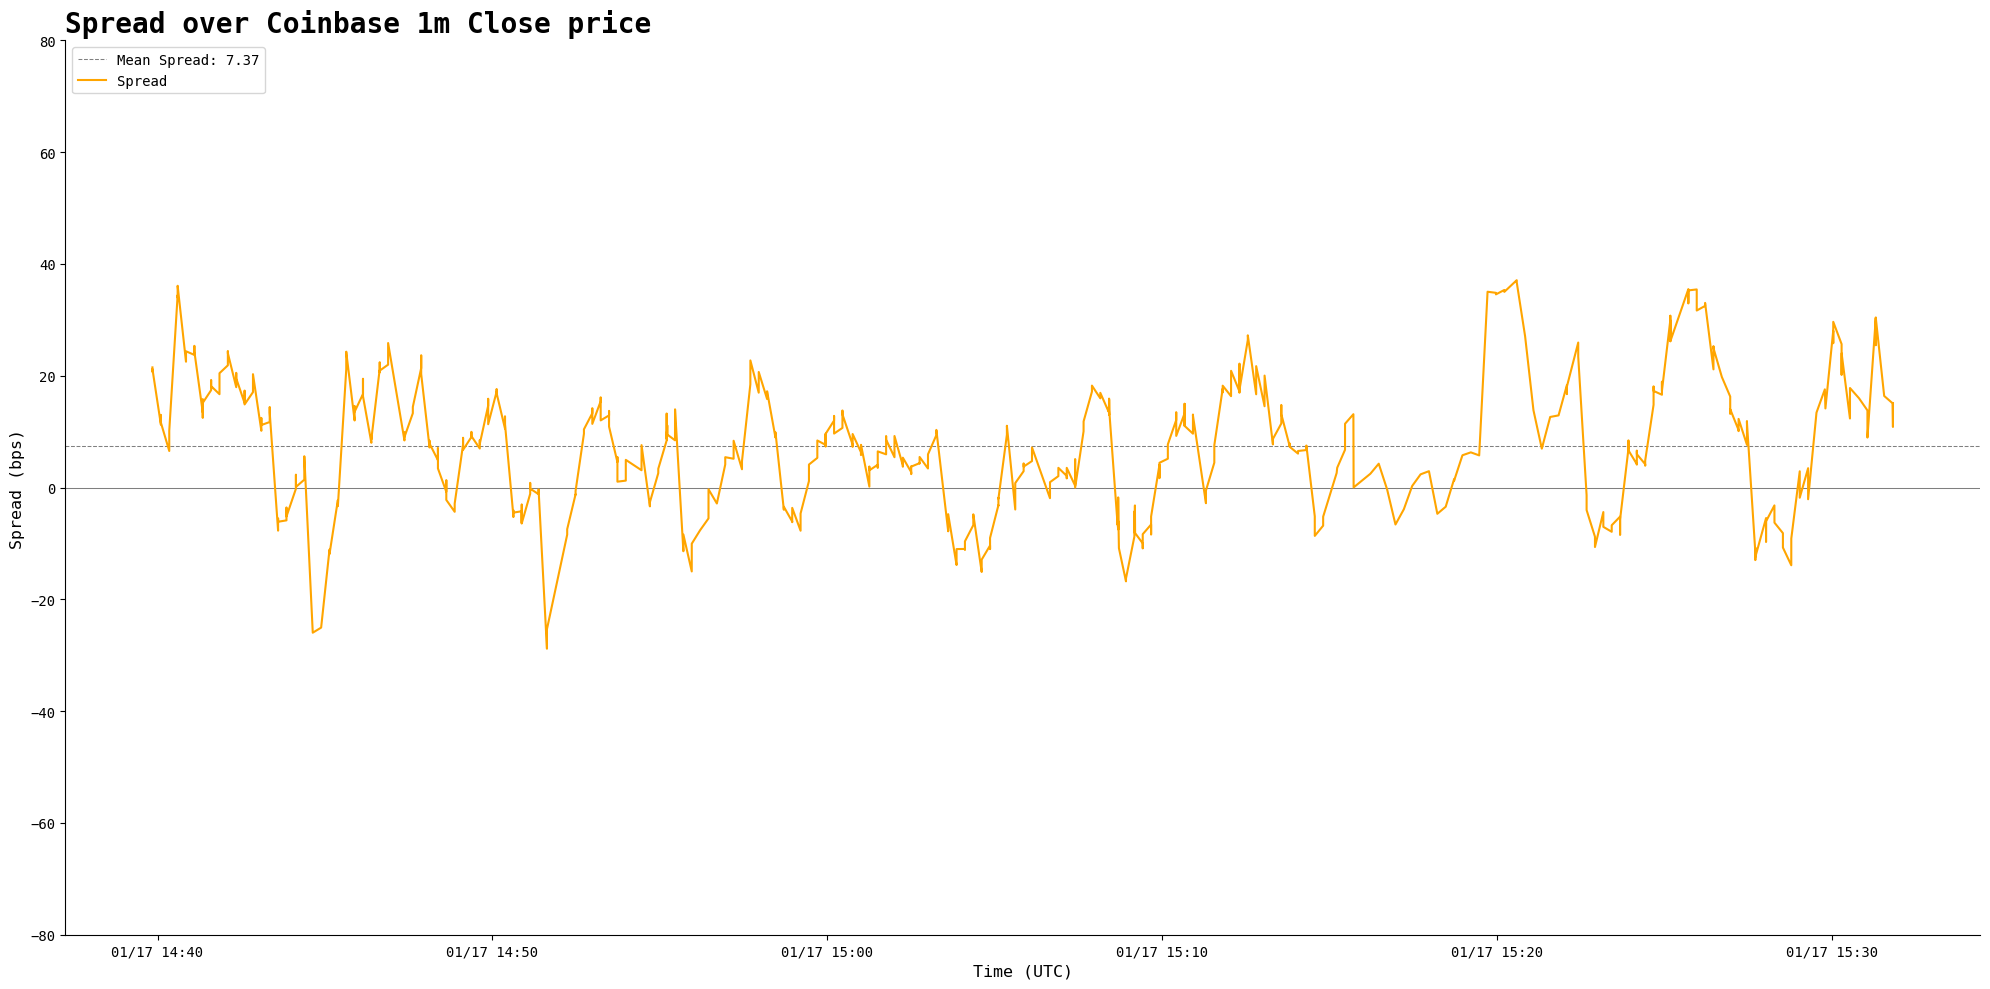

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
mean_spread_1 = mstr_fills_converted_coinbase['spread_executed_px'].mean()
time_diff_1 = mstr_fills_converted_coinbase['Timestamp'].diff()
gap_threshold = pd.Timedelta(minutes=2)
mstr_fills_converted_coinbase['group'] = (time_diff_1 > gap_threshold).cumsum()

# Plot CandidateMarketBestBid and CandidateMarketBestOffer for each CandidateMarket
# for market in mstr_fills_converted['CandidateMarket'].unique():#["cumberland"]:#mstr_fills_converted['CandidateMarket'].unique():#
#     market_data = mstr_fills_converted[mstr_fills_converted['CandidateMarket'] == market]
#     #ax.plot(market_data['Timestamp'], market_data['CandidateMarketBestBid'], label=f'{market} Bid', linestyle='--')
#     ax.plot(market_data['Timestamp'], market_data['CandidateMarketBestOffer'], label=f'{market} Offer', linewidth=0.75)

# Plot Price
ax.axhline(y=mean_spread_1, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread_1:.2f}', linewidth=0.75)
ax.axhline(y=0, color='black', alpha=0.5, linewidth=0.75)
# ax.plot(mstr_fills_converted['Timestamp'], mstr_fills_converted['spread_executed_px'], color='darkorange', label='Executed Price', linewidth=1, alpha=1)
for _, group in mstr_fills_converted_coinbase.groupby('group'):
    ax.plot(group['Timestamp'], group['spread_executed_px'], color='orange', label='Spread' if _ == 0 else "")

ax.set_xlabel('Time (UTC)', fontsize=12, fontfamily="monospace")
ax.set_ylabel('Spread (bps)', fontsize=12, fontfamily="monospace")
ax.tick_params(axis='y')
ax.spines[['top', "right"]].set_visible(False)
ax.set_ylim(-80,80)

ax.legend(loc='upper left')

# ax2 = ax.twinx()
# ax2.plot(coinbase_talos_prices['Timestamp'], coinbase_talos_prices['Close'], color='blue', label='Price', linewidth=0.75, linestyle='--', alpha=0.5)
# ax2.spines[['top']].set_visible(False)


plt.title('Spread over Coinbase 1m Close price', loc='left', fontsize=20, fontweight="bold", fontfamily="monospace")
#plt.gcf().autofmt_xdate() 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

plt.tight_layout()
plt.show()

NameError: name 'mstr_fills_converted_binance' is not defined

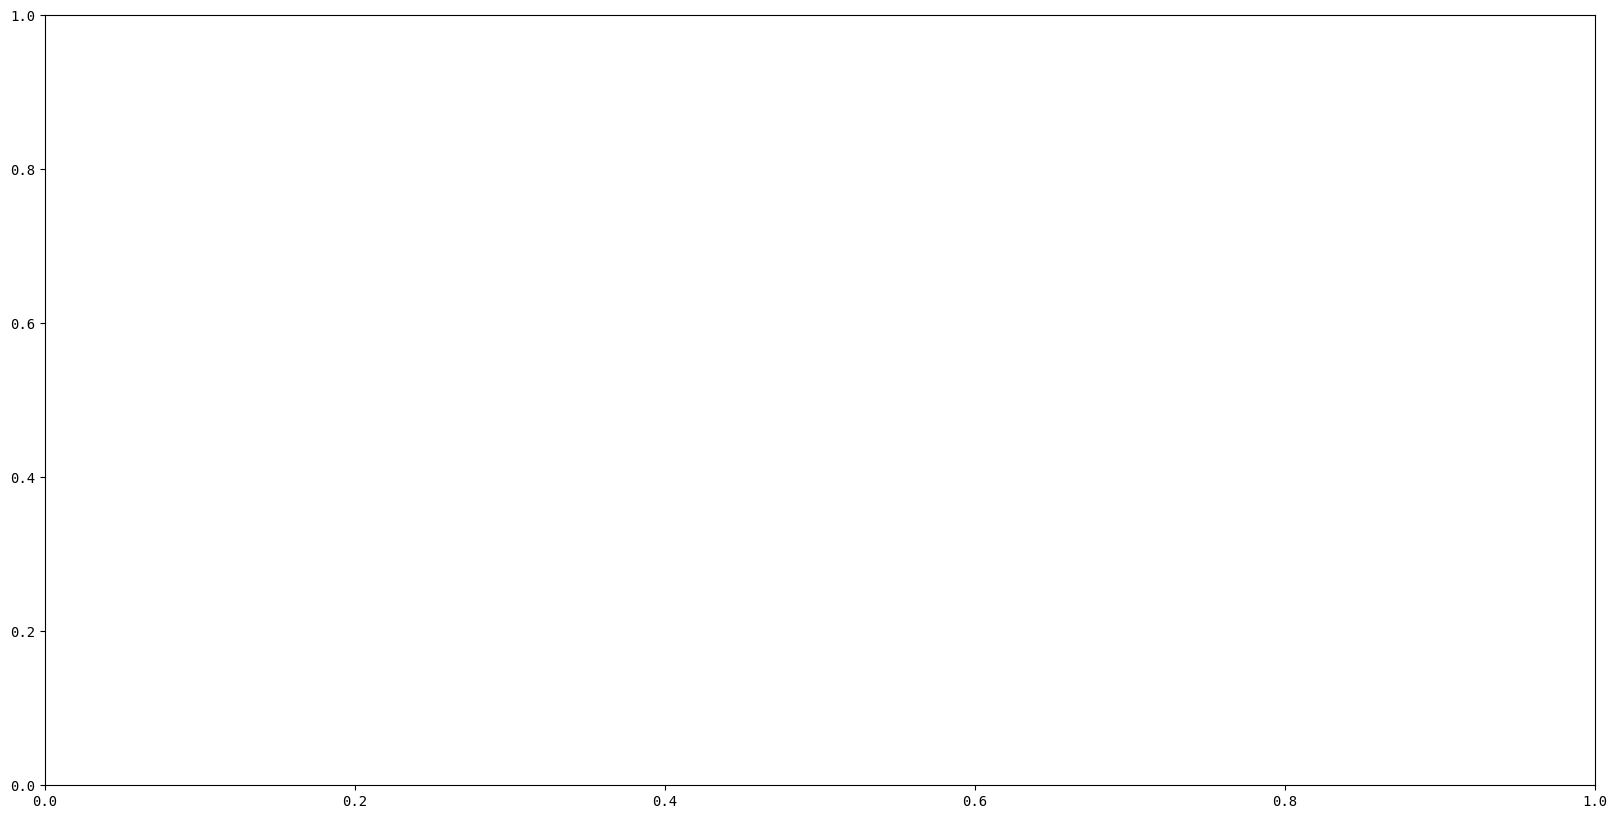

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
mean_spread_2 = mstr_fills_converted_binance['spread_executed_px'].mean()
time_diff_2 = mstr_fills_converted_binance['Timestamp'].diff()
gap_threshold = pd.Timedelta(minutes=2)
mstr_fills_converted_binance['group'] = (time_diff_2 > gap_threshold).cumsum()

ax.axhline(y=mean_spread_2, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread_2:.2f}', linewidth=0.75)
ax.axhline(y=0, color='black', alpha=0.5, linewidth=0.75)
#ax.plot(mstr_fills_converted_binance['Timestamp'], mstr_fills_converted_binance['spread_executed_px'], color='orange', label='Executed Price', linewidth=1, alpha=1)
for _, group in mstr_fills_converted_binance.groupby('group'):
    ax.plot(group['Timestamp'], group['spread_executed_px'], color='orange', label='Spread' if _ == 0 else "")

ax.set_xlabel('Timestamp', fontsize=12, fontfamily="monospace")
ax.set_ylabel('Spread', fontsize=12, fontfamily="monospace")
ax.tick_params(axis='y')
ax.spines[['top']].set_visible(False)
ax.set_ylim(-15,15)

ax.legend(loc='upper left')

plt.title('Spread over Binance BTC/USDT 1s Close price (USD Adjusted)', loc='left', fontsize=20, fontweight="bold", fontfamily="monospace")
#plt.gcf().autofmt_xdate() 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

plt.tight_layout()
plt.show()

NameError: name 'mstr_fills_converted_binance_1m' is not defined

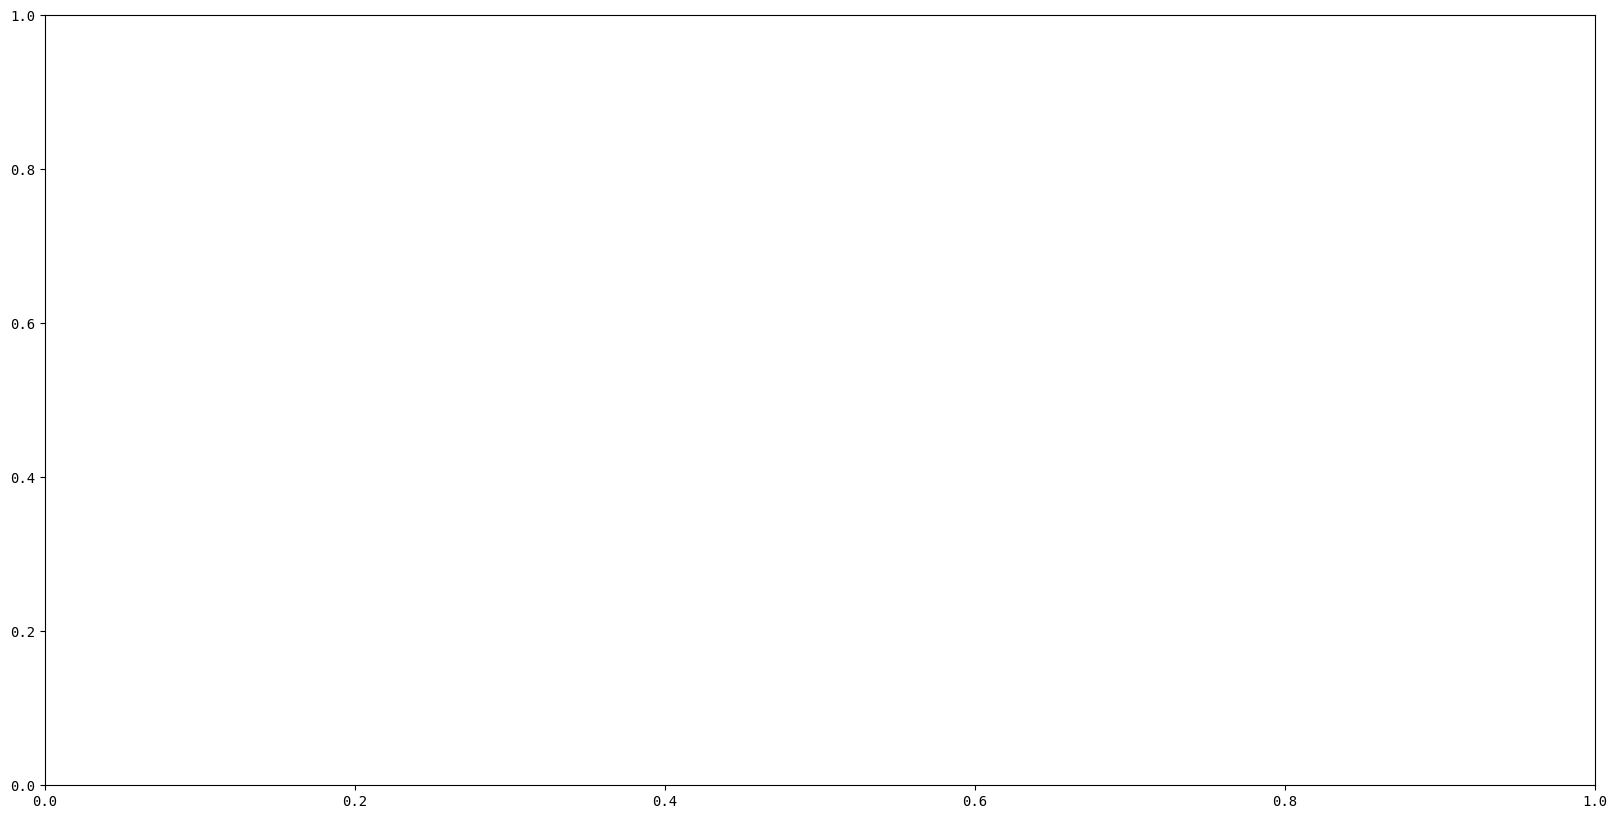

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
mean_spread_3 = mstr_fills_converted_binance_1m['spread_executed_px'].mean()
time_diff_3 = mstr_fills_converted_binance_1m['Timestamp'].diff()
gap_threshold = pd.Timedelta(minutes=2)
mstr_fills_converted_binance_1m['group'] = (time_diff_3 > gap_threshold).cumsum()

# Plot CandidateMarketBestBid and CandidateMarketBestOffer for each CandidateMarket
# for market in mstr_fills_converted['CandidateMarket'].unique():#["cumberland"]:#mstr_fills_converted['CandidateMarket'].unique():#
#     market_data = mstr_fills_converted[mstr_fills_converted['CandidateMarket'] == market]
#     #ax.plot(market_data['Timestamp'], market_data['CandidateMarketBestBid'], label=f'{market} Bid', linestyle='--')
#     ax.plot(market_data['Timestamp'], market_data['CandidateMarketBestOffer'], label=f'{market} Offer', linewidth=0.75)

# Plot Price
ax.axhline(y=mean_spread_3, color='grey', linestyle='--', label=f'Mean Spread: {mean_spread_3:.2f}', linewidth=0.75)
ax.axhline(y=0, color='black', alpha=0.5, linewidth=0.75)
for _, group in mstr_fills_converted_binance_1m.groupby('group'):
    ax.plot(group['Timestamp'], group['spread_executed_px'], color='orange', label='Spread' if _ == 0 else "")
# ax.plot(mstr_fills_converted_binance_1m['Timestamp'], mstr_fills_converted_binance_1m['spread_executed_px'], color='orange', label='Executed Price', linewidth=1, alpha=1)

ax.set_xlabel('Timestamp', fontsize=12, fontfamily="monospace")
ax.set_ylabel('Spread', fontsize=12, fontfamily="monospace")
ax.tick_params(axis='y')
ax.spines[['top']].set_visible(False)
ax.set_ylim(-80,80)

ax.legend(loc='upper left')

plt.title('Spread vs Binance BTC/USDT 1s Close price (USD Adjusted) over orders lifetime', loc='left', fontsize=20, fontweight="bold", fontfamily="monospace")
#plt.gcf().autofmt_xdate() 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

plt.tight_layout()
plt.show()